In [1]:
import ROOT
ROOT.gStyle.SetOptStat(0)
ROOT.enableJSVis()

Welcome to JupyROOT 6.12/04


In [2]:
%%cpp -d
#include "common/My_ROOT_Utilities.h"

In [3]:
f_in = ROOT.TFile("/uboone/data/users/wketchum/nue_mctruth_output_pke20.root","READ")
ana = f_in.Get("ana")

In [4]:
NBINS = 35
BINLOWEDGE=0.0
BINHIGHEDGE=3.5

In [5]:
h_nue = ROOT.TH1F("h_nue","Neutrino Energy Distribution;E_{#nu};Events / 100 MeV",NBINS,BINLOWEDGE,BINHIGHEDGE);
h_nue_cc = ROOT.TH1F("h_nue_cc","Neutrino Energy Distribution;E_{#nu};Events / 100 MeV",NBINS,BINLOWEDGE,BINHIGHEDGE);
h_nue_nc = ROOT.TH1F("h_nue_nc","Neutrino Energy Distribution;E_{#nu};Events / 100 MeV",NBINS,BINLOWEDGE,BINHIGHEDGE);

In [6]:
ana.Project("h_nue","nu_energy","1");
ana.Project("h_nue_cc","nu_energy","ccnc==0");
ana.Project("h_nue_nc","nu_energy","ccnc==1");

In [7]:
h_nue_cc.SetLineColor(ROOT.kBlack)
h_nue_cc.SetFillColor(ROOT.kRed)
h_nue_nc.SetLineColor(ROOT.kBlack)
h_nue_nc.SetFillColor(ROOT.kYellow)
  
ROOT.ShowUnderOverFlow(h_nue)
ROOT.ShowUnderOverFlow(h_nue_cc)
ROOT.ShowUnderOverFlow(h_nue_nc)

In [8]:
h_nue_st0 = ROOT.THStack("h_nue_st0","Neutrino Energy Distribution;E_{#nu};Events / 100 MeV")
h_nue_st0.Add(h_nue_cc)
h_nue_st0.Add(h_nue_nc)

In [9]:
c0 = ROOT.TCanvas("c0","MyCanvas")
c0.cd()
h_nue_st0.Draw()
leg0 = ROOT.TLegend(0.7,0.7,0.9,0.9)
leg0.AddEntry(h_nue_cc,"#nu_{e} CC","f")
leg0.AddEntry(h_nue_nc,"#nu_{e} NC","f")
leg0.Draw();
c0.Draw()

In [10]:
h_nue_mb = ROOT.TH1F("h_nue_mb","Neutrino Energy Distribution;E_{#nu};Events / 100 MeV",NBINS,BINLOWEDGE,BINHIGHEDGE)
h_nue_0p = ROOT.TH1F("h_nue_0p","Neutrino Energy Distribution;E_{#nu};Events / 100 MeV",NBINS,BINLOWEDGE,BINHIGHEDGE)
h_nue_1p = ROOT.TH1F("h_nue_1p","Neutrino Energy Distribution;E_{#nu};Events / 100 MeV",NBINS,BINLOWEDGE,BINHIGHEDGE)
h_nue_Np = ROOT.TH1F("h_nue_Np","Neutrino Energy Distribution;E_{#nu};Events / 100 MeV",NBINS,BINLOWEDGE,BINHIGHEDGE)
h_nue_Npi = ROOT.TH1F("h_nue_Npi","Neutrino Energy Distribution;E_{#nu};Events / 100 MeV",NBINS,BINLOWEDGE,BINHIGHEDGE)
h_nue_Npi0 = ROOT.TH1F("h_nue_Npi0","Neutrino Energy Distribution;E_{#nu};Events / 100 MeV",NBINS,BINLOWEDGE,BINHIGHEDGE)


In [11]:
ana.Project("h_nue_mb","nu_energy","ccnc==0 && n_lep>=0 && n_pi==0 && n_pi0==0");
ana.Project("h_nue_0p","nu_energy","ccnc==0 && n_lep>=0 && n_proton==0 && n_pi==0 && n_pi0==0");
ana.Project("h_nue_1p","nu_energy","ccnc==0 && n_lep>=0 && n_proton==1 && n_pi==0 && n_pi0==0");
ana.Project("h_nue_Np","nu_energy","ccnc==0 && n_lep>=0 && n_proton>1 && n_pi==0 && n_pi0==0");
ana.Project("h_nue_Npi","nu_energy","ccnc==0 && n_lep>=0 && n_pi>0 && n_pi0==0");
ana.Project("h_nue_Npi0","nu_energy","ccnc==0 && n_lep>=0 && n_pi0>0");

In [12]:
h_nue_mb.SetLineColor(ROOT.kBlack); h_nue_mb.SetFillColor(ROOT.kYellow+4);
h_nue_0p.SetLineColor(ROOT.kBlack); h_nue_0p.SetFillColor(ROOT.kOrange+7);
h_nue_1p.SetLineColor(ROOT.kBlack); h_nue_1p.SetFillColor(ROOT.kBlue);
h_nue_Np.SetLineColor(ROOT.kBlack); h_nue_Np.SetFillColor(ROOT.kCyan);
h_nue_Npi.SetLineColor(ROOT.kBlack); h_nue_Npi.SetFillColor(ROOT.kGreen+2);
h_nue_Npi0.SetLineColor(ROOT.kBlack); h_nue_Npi0.SetFillColor(ROOT.kGreen);

ROOT.ShowUnderOverFlow(h_nue_mb);
ROOT.ShowUnderOverFlow(h_nue_0p);
ROOT.ShowUnderOverFlow(h_nue_1p);
ROOT.ShowUnderOverFlow(h_nue_Np);
ROOT.ShowUnderOverFlow(h_nue_Npi);
ROOT.ShowUnderOverFlow(h_nue_Npi0);

In [13]:
c1 = ROOT.TCanvas("c1","Canvas1");
c1.cd();
h_nue_cc.Draw();
#h_nue_Ntrk.Draw("same");
h_nue_1p.Draw("same");
h_nue_Np.Draw("same");
leg1 = ROOT.TLegend(0.7,0.7,0.9,0.9);
leg1.AddEntry(h_nue_cc,"#nu_{e} CC inclusive","f");
leg1.AddEntry(h_nue_Np,"#nu_{e} 1eNp0#pi","f");
leg1.AddEntry(h_nue_1p,"#nu_{e} 1e1p0#pi","f");
leg1.Draw();
c1.Draw()

In [14]:
h_nue_mb_eff = ROOT.TH1F("h_nue_mb_eff","Neutrino Energy Distribution;E_{#nu};Efficiency",NBINS,BINLOWEDGE,BINHIGHEDGE)
h_nue_0p_eff = ROOT.TH1F("h_nue_0p_eff","Neutrino Energy Distribution;E_{#nu};Efficiency",NBINS,BINLOWEDGE,BINHIGHEDGE)
h_nue_1p_eff = ROOT.TH1F("h_nue_1p_eff","Neutrino Energy Distribution;E_{#nu};Efficiency",NBINS,BINLOWEDGE,BINHIGHEDGE)
h_nue_Np_eff = ROOT.TH1F("h_nue_Np_eff","Neutrino Energy Distribution;E_{#nu};Efficiency",NBINS,BINLOWEDGE,BINHIGHEDGE)
h_nue_Npi_eff = ROOT.TH1F("h_nue_Npi_eff","Neutrino Energy Distribution;E_{#nu};Efficiency",NBINS,BINLOWEDGE,BINHIGHEDGE)
h_nue_Npi0_eff = ROOT.TH1F("h_nue_Npi0_eff","Neutrino Energy Distribution;E_{#nu};Efficiency",NBINS,BINLOWEDGE,BINHIGHEDGE)

for i in range(1,h_nue_cc.GetNbinsX()+1):
    h_nue_mb_eff.SetBinContent(i,h_nue_mb.GetBinContent(i)/h_nue_cc.GetBinContent(i));
    h_nue_mb_eff.SetBinError(i,ROOT.TMath.Sqrt(h_nue_mb_eff.GetBinContent(i)*(1-h_nue_mb_eff.GetBinContent(i))/h_nue_cc.GetBinContent(i)));
    h_nue_0p_eff.SetBinContent(i,h_nue_0p.GetBinContent(i)/h_nue_cc.GetBinContent(i));
    h_nue_0p_eff.SetBinError(i,ROOT.TMath.Sqrt(h_nue_0p_eff.GetBinContent(i)*(1-h_nue_0p_eff.GetBinContent(i))/h_nue_cc.GetBinContent(i)));
    h_nue_1p_eff.SetBinContent(i,h_nue_1p.GetBinContent(i)/h_nue_cc.GetBinContent(i));
    h_nue_1p_eff.SetBinError(i,ROOT.TMath.Sqrt(h_nue_1p_eff.GetBinContent(i)*(1-h_nue_1p_eff.GetBinContent(i))/h_nue_cc.GetBinContent(i)));
    h_nue_Np_eff.SetBinContent(i,h_nue_Np.GetBinContent(i)/h_nue_cc.GetBinContent(i));
    h_nue_Np_eff.SetBinError(i,ROOT.TMath.Sqrt(h_nue_Np_eff.GetBinContent(i)*(1-h_nue_Np_eff.GetBinContent(i))/h_nue_cc.GetBinContent(i)));
    h_nue_Npi_eff.SetBinContent(i,h_nue_Npi.GetBinContent(i)/h_nue_cc.GetBinContent(i));
    h_nue_Npi_eff.SetBinError(i,ROOT.TMath.Sqrt(h_nue_Npi_eff.GetBinContent(i)*(1-h_nue_Npi_eff.GetBinContent(i))/h_nue_cc.GetBinContent(i)));
    h_nue_Npi0_eff.SetBinContent(i,h_nue_Npi0.GetBinContent(i)/h_nue_cc.GetBinContent(i));
    h_nue_Npi0_eff.SetBinError(i,ROOT.TMath.Sqrt(h_nue_Npi0_eff.GetBinContent(i)*(1-h_nue_Npi0_eff.GetBinContent(i))/h_nue_cc.GetBinContent(i)));



In [15]:
h_nue_mb_eff.SetLineColor(ROOT.kYellow+4);
h_nue_0p_eff.SetLineColor(ROOT.kOrange+7);
h_nue_1p_eff.SetLineColor(ROOT.kBlue);
h_nue_Np_eff.SetLineColor(ROOT.kCyan);
h_nue_Npi_eff.SetLineColor(ROOT.kGreen+2);
h_nue_mb_eff.SetFillColor(ROOT.kYellow+4);
h_nue_0p_eff.SetFillColor(ROOT.kOrange+7);
h_nue_1p_eff.SetFillColor(ROOT.kBlue);
h_nue_Np_eff.SetFillColor(ROOT.kCyan);
h_nue_Npi_eff.SetFillColor(ROOT.kGreen+2);
h_nue_Npi0_eff.SetFillColor(ROOT.kGreen);
h_nue_mb_eff.SetMarkerColor(ROOT.kYellow+4);
h_nue_0p_eff.SetMarkerColor(ROOT.kOrange+7);
h_nue_1p_eff.SetMarkerColor(ROOT.kBlue);
h_nue_Np_eff.SetMarkerColor(ROOT.kCyan);
h_nue_Npi_eff.SetMarkerColor(ROOT.kGreen+2);
h_nue_Npi0_eff.SetMarkerColor(ROOT.kGreen);
h_nue_mb_eff.SetMarkerStyle(8);
h_nue_0p_eff.SetMarkerStyle(8);
h_nue_1p_eff.SetMarkerStyle(8);
h_nue_Np_eff.SetMarkerStyle(8);
h_nue_Npi_eff.SetMarkerStyle(8);
h_nue_Npi0_eff.SetMarkerStyle(8);

In [16]:
c2 = ROOT.TCanvas("c2","Canvas2");
c2.cd();
h_nue_Np_eff.SetMaximum(1.1); h_nue_Np_eff.SetMinimum(0.0);
h_nue_Np_eff.Draw("e");
h_nue_1p_eff.Draw("esame");
h_nue_0p_eff.Draw("esame");
h_nue_Npi_eff.Draw("esame");
h_nue_Npi0_eff.Draw("esame");
leg2 = ROOT.TLegend(0.7,0.7,0.9,0.9);
leg2.AddEntry(h_nue_Npi0_eff,"#nu_{e} 1e,Np,N#pi^{#pm},N#pi^{0}","lp");
leg2.AddEntry(h_nue_Npi_eff,"#nu_{e} 1e,Np,N#pi^{#pm},0#pi^{0}","lp");
leg2.AddEntry(h_nue_Np_eff,"#nu_{e} 1e,>1p,0#pi","lp");
leg2.AddEntry(h_nue_1p_eff,"#nu_{e} 1e,1p,0#pi","lp");
leg2.AddEntry(h_nue_0p_eff,"#nu_{e} 1e,0p,0#pi","lp");
leg2.Draw();
c2.Draw()

In [17]:
h_nue_st1 = ROOT.THStack("h_nue_st1","Neutrino Energy Distribution;E_{#nu};Fraction of Events");
h_nue_st1.Add(h_nue_0p_eff);
h_nue_st1.Add(h_nue_1p_eff);
h_nue_st1.Add(h_nue_Np_eff);
h_nue_st1.Add(h_nue_Npi_eff);
h_nue_st1.Add(h_nue_Npi0_eff);

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c3


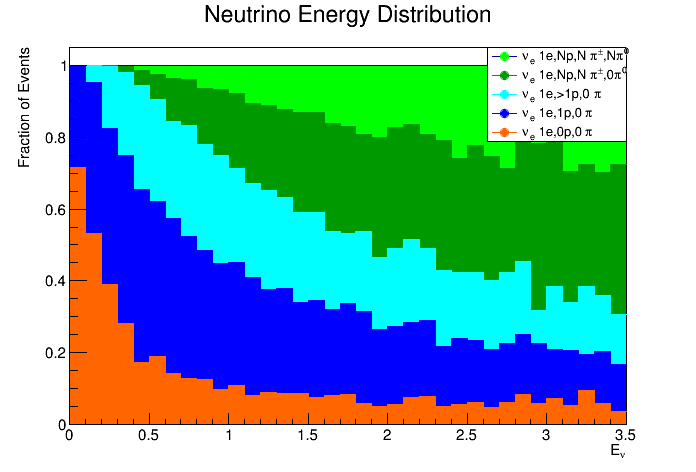

In [21]:
ROOT.disableJSVis()
c3 = ROOT.TCanvas("c3","MyCanvas")
c3.cd()
h_nue_st1.Draw("HIST")
#leg0 = ROOT.TLegend(0.7,0.7,0.9,0.9)
#leg0.AddEntry(h_nue_cc,"#nu_{e} CC","f")
#leg0.AddEntry(h_nue_nc,"#nu_{e} NC","f")
#leg0.Draw();
leg2.Draw()
c3.Draw()

In [20]:
hp_nue_pke = ROOT.TProfile("hp_nue_pke",";E_{#nu};p_{KE}",NBINS,BINLOWEDGE,BINHIGHEDGE);
hp_nue_pke.BuildOptions(0.0,1000,"s");
ana.Project("hp_nue_pke","max_proton_ke:nu_energy","ccnc==0 && n_lep>=0");
c4 = ROOT.TCanvas("c4","MyCanvas")
c4.cd()
#hp_nue_pke.Draw();
ana.Draw("max_proton_ke:nu_energy>>(15,0,3.0,10,0.0,0.1)","ccnc==0 && n_lep>=0 && max_proton_ke>0","LEGO2")
c4.Draw()

Warning in <TFile::Append>: Replacing existing TH1: hp_nue_pke (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c4
